In [1]:
import numpy as np
import pandas as pd

In [2]:
customer=pd.read_csv('AdventureWorks Customer Lookup.csv',encoding='ISO-8859-1')

In [3]:
customer['name'] = customer['FirstName'] + ' ' + customer['LastName']

In [4]:
customer.dropna(inplace=True)

In [5]:
customer.drop(['FirstName','LastName','Prefix'],axis=1,inplace=True)

In [6]:
sales_2020=pd.read_csv('AdventureWorks Sales Data 2020.csv')

In [7]:
sales_2021=pd.read_csv('AdventureWorks Sales Data 2021.csv')

In [8]:
sales_2022=pd.read_csv('AdventureWorks Sales Data 2022.csv')

In [9]:
sales_data=pd.concat([sales_2020,sales_2021,sales_2022],ignore_index=True)

In [10]:
sales_data

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1
3,2020-01-01,2019-11-16,SO45081,338,26782,6,1,1
4,2020-01-02,2019-12-15,SO45083,312,14947,10,1,1
...,...,...,...,...,...,...,...,...
56041,2022-06-30,2022-03-22,SO74143,477,28517,10,3,2
56042,2022-06-30,2022-03-15,SO74143,479,28517,10,2,1
56043,2022-06-30,2022-04-08,SO74143,606,28517,10,1,1
56044,2022-06-30,2022-05-15,SO74124,480,21676,7,2,2


In [11]:
existing_customer=sales_data.groupby('CustomerKey').agg(CustomerComeback=('OrderNumber',lambda x:x.count())).reset_index()
existing_customer

,CustomerKey,CustomerComeback
0,11000,7
1,11001,10
2,11002,3
3,11003,8
4,11004,5
...,...,...
17411,29479,1
17412,29480,5
17413,29481,1
17414,29482,1


In [12]:
 existing_customer['ReturnCustomer']=np.where(existing_customer['CustomerComeback']>1,"Yes","No")

In [13]:
existing_customer

,CustomerKey,CustomerComeback,ReturnCustomer
0,11000,7,Yes
1,11001,10,Yes
2,11002,3,Yes
3,11003,8,Yes
4,11004,5,Yes
...,...,...,...
17411,29479,1,No
17412,29480,5,Yes
17413,29481,1,No
17414,29482,1,No


In [14]:
sales_data['OrderDate']=pd.to_datetime(sales_data['OrderDate'])

In [15]:
sales_data['StockDate']=pd.to_datetime(sales_data['StockDate'])

In [16]:
max_date=pd.to_datetime(sales_data['OrderDate'].max())

In [17]:
product_table=pd.read_csv('AdventureWorks Product Lookup.csv')

In [18]:
sales_data.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity'],
      dtype='object')

In [19]:
product_table.columns

Index(['ProductKey', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice'],
      dtype='object')

In [20]:
sales_data=sales_data.merge(product_table,how='inner',on='ProductKey').drop(['ProductSubcategoryKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle'],axis=1)

In [21]:
sales_data

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ProductCost,ProductPrice
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1,413.1463,699.0982
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2171.2942,3578.2700
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1,1898.0944,3374.9900
3,2020-01-01,2019-11-16,SO45081,338,26782,6,1,1,413.1463,699.0982
4,2020-01-02,2019-12-15,SO45083,312,14947,10,1,1,2171.2942,3578.2700
...,...,...,...,...,...,...,...,...,...,...
56041,2022-06-30,2022-03-22,SO74143,477,28517,10,3,2,1.8663,4.9900
56042,2022-06-30,2022-03-15,SO74143,479,28517,10,2,1,3.3623,8.9900
56043,2022-06-30,2022-04-08,SO74143,606,28517,10,1,1,343.6496,539.9900
56044,2022-06-30,2022-05-15,SO74124,480,21676,7,2,2,0.8565,2.2900


In [22]:
rfm=sales_data.groupby('CustomerKey').agg(recency=('OrderDate',lambda x : (max_date-x.max()).days),frequency=('OrderNumber','count'),monetary=('ProductPrice',lambda x:x.sum())).reset_index()

In [23]:
rfm

,CustomerKey,recency,frequency,monetary
0,11000,238,7,4600.4296
1,11001,18,10,2758.6280
2,11002,307,3,4466.8124
3,11003,231,8,4493.0624
4,11004,240,5,4546.1038
...,...,...,...,...
17411,29479,479,1,2049.0982
17412,29480,163,5,2440.3384
17413,29481,868,1,3374.9900
17414,29482,465,1,2049.0982


In [24]:
import sklearn

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
wcss=[]
silhouettescore=[]
for i in range(2,30):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(rfm.drop('CustomerKey',axis=1))
    wcss.append(kmeans.inertia_)
    silhouettescore.append(silhouette_score(rfm.drop('CustomerKey',axis=1),kmeans.predict(rfm.drop('CustomerKey',axis=1))))

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

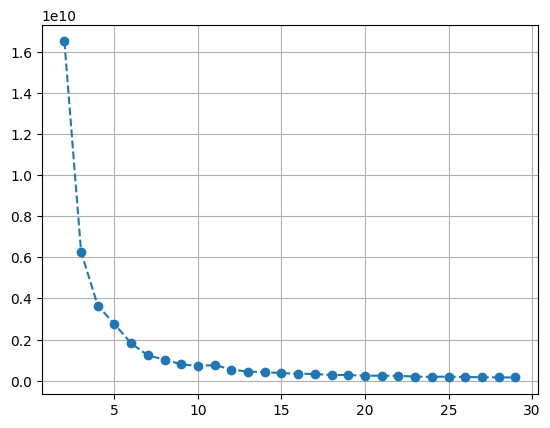

In [28]:
plt.plot(range(2,30),wcss,marker='o',linestyle='--')
plt.grid()
plt.show()

In [29]:
## From the WCSS above we can see that the number of clusters is 3,4,5

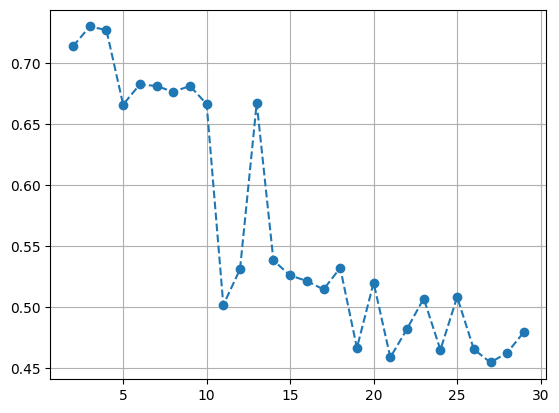

In [30]:
plt.plot(range(2,30),silhouettescore,marker='o',linestyle='--')
plt.grid()
plt.show()

In [31]:
#From the silhouette score above we can see the one with the highest silhouette score is for 3 clusters

In [32]:
#Basis the WCSS score and silhouette score we can take the number of clusters to be 3

In [33]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(rfm.drop('CustomerKey',axis=1))
kmeans.labels_

array([1, 2, 1, ..., 2, 2, 2])

In [34]:
rfm['Cluster']=kmeans.labels_

In [35]:
rfm.drop('CustomerKey',axis=1).groupby('Cluster').mean()

,recency,frequency,monetary
Cluster,,,
0,155.448875,2.848425,227.486571
1,139.524380,4.843725,5269.176861
2,178.190852,3.228444,2337.439466


In [36]:
rfm['Cluster']=rfm['Cluster'].replace({0:'Moderate Value Customers',1:'Low Frequency and Low Value Customers',2:'High Value Customers'})

In [37]:
rfm

,CustomerKey,recency,frequency,monetary,Cluster
0,11000,238,7,4600.4296,Low Frequency and Low Value Customers
1,11001,18,10,2758.6280,High Value Customers
2,11002,307,3,4466.8124,Low Frequency and Low Value Customers
3,11003,231,8,4493.0624,Low Frequency and Low Value Customers
4,11004,240,5,4546.1038,Low Frequency and Low Value Customers
...,...,...,...,...,...
17411,29479,479,1,2049.0982,High Value Customers
17412,29480,163,5,2440.3384,High Value Customers
17413,29481,868,1,3374.9900,High Value Customers
17414,29482,465,1,2049.0982,High Value Customers


In [38]:
customer['CustomerKey']=customer['CustomerKey'].astype('int')

In [39]:
rfm['CustomerKey']=rfm['CustomerKey'].astype('int')

In [40]:
customer=customer.merge(rfm,how='inner',on='CustomerKey')

In [41]:
customer['BirthDate']=pd.to_datetime(customer['BirthDate'])

In [42]:
customer['Age']=round((max_date-customer['BirthDate']).dt.days/365,0)

In [43]:
customer['MaritalStatus']=customer['MaritalStatus'].str.strip()

In [44]:
customer.columns

Index(['CustomerKey', 'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress',
       'AnnualIncome', 'TotalChildren', 'EducationLevel', 'Occupation',
       'HomeOwner', 'name', 'recency', 'frequency', 'monetary', 'Cluster',
       'Age'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
#customer['MaritalStatus']=LabelEncoder().fit_transform(customer['MaritalStatus'])

In [65]:
customer['MaritalStatus']=customer['MaritalStatus'].replace({1:'M',0:'S'})

In [66]:
from collections import Counter

In [67]:
Counter(customer['MaritalStatus'])

Counter({'M': 9373, 'S': 7920})

In [78]:
customer


,CustomerKey,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,name,recency,frequency,monetary,Cluster,Age
0,11000,1966-04-08,M,M,jon24@adventure-works.com,90000.0,2.0,Bachelors,Professional,Y,JON YANG,238,7,4600.4296,Low Frequency and Low Value Customers,56.0
1,11001,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,3.0,Bachelors,Professional,N,EUGENE HUANG,18,10,2758.6280,High Value Customers,57.0
2,11002,1965-08-12,M,M,ruben35@adventure-works.com,60000.0,3.0,Bachelors,Professional,Y,RUBEN TORRES,307,3,4466.8124,Low Frequency and Low Value Customers,57.0
3,11003,1968-02-15,S,F,christy12@adventure-works.com,70000.0,0.0,Bachelors,Professional,N,CHRISTY ZHU,231,8,4493.0624,Low Frequency and Low Value Customers,54.0
4,11004,1968-08-08,S,F,elizabeth5@adventure-works.com,80000.0,5.0,Bachelors,Professional,Y,ELIZABETH JOHNSON,240,5,4546.1038,Low Frequency and Low Value Customers,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17288,29479,1958-07-04,M,M,tommy2@adventure-works.com,30000.0,1.0,Graduate Degree,Clerical,Y,TOMMY TANG,479,1,2049.0982,High Value Customers,64.0
17289,29480,1960-11-10,S,F,nina21@adventure-works.com,30000.0,3.0,Graduate Degree,Clerical,Y,NINA RAJI,163,5,2440.3384,High Value Customers,62.0
17290,29481,1960-01-05,S,M,ivan0@adventure-works.com,30000.0,3.0,Graduate Degree,Clerical,N,IVAN SURI,868,1,3374.9900,High Value Customers,63.0
17291,29482,1959-03-05,M,M,clayton0@adventure-works.com,30000.0,3.0,Bachelors,Clerical,Y,CLAYTON ZHANG,465,1,2049.0982,High Value Customers,63.0


In [79]:
rfm.drop('CustomerKey',axis=1).groupby('Cluster').mean()

,recency,frequency,monetary
Cluster,,,
High Value Customers,178.190852,3.228444,2337.439466
Low Frequency and Low Value Customers,139.524380,4.843725,5269.176861
Moderate Value Customers,155.448875,2.848425,227.486571
